# **PROJECT-3. EDA + Feature Engineering. Соревнование на Kaggle**

Первоначальная версия датасета содержит 17 полей со следующей информацией:
- hotel_address — адрес отеля;
- review_date — дата, когда рецензент разместил соответствующий отзыв;
- average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
- hotel_name — название отеля;
- reviewer_nationality — страна рецензента;
- negative_review — отрицательный отзыв, который рецензент дал отелю;
- review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
- positive_review — положительный отзыв, который рецензент дал отелю;
- review_total_positive_word_counts — общее количество слов в положительном отзыве.
- reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
- total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
- total_number_of_reviews — общее количество действительных отзывов об отеле;
- tags — теги, которые рецензент дал отелю;
- days_since_review — количество дней между датой проверки и датой очистки;
- additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
- lat — географическая широта отеля;
- lng — географическая долгота отеля.

In [43]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.feature_selection import f_classif 

In [3]:
# читаем данные
hotels_df = pd.read_csv('/Users/alanadziccoeva/Python_study/Project-3/!hotels.csv')
hotels_df.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


>**Предварительный анализ и обработка данных**

In [4]:
# В каких столбцах данные содержат пропущенные значения?
# В каких столбцах данные хранятся в числовом формате?
# В каких столбцах данные представляют собой строки?
# Напишите признак, представляющий собой дату.
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

***Обратим внимание на пропущенные значения в lat и lng. Вернемся к этому позже***

In [10]:
# Сколько уникальных названий отелей представлено в наборе данных?
hotels_df['hotel_name'].nunique()

1492

In [ ]:
# Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.
hotels_df['review_date'] = pd.to_datetime(hotels_df['review_date'])
hotels_df['review_date'].sort_values(ascending=False).head(1)

268933   2017-08-03
Name: review_date, dtype: datetime64[ns]

In [15]:
# Когда был оставлен самый первый отзыв? Введите ответ в формате yyyy-mm-dd.
hotels_df['review_date'].sort_values(ascending=True).head(1)

143997   2015-08-04
Name: review_date, dtype: datetime64[ns]

In [19]:
# Сколько уникальных тегов представлено в наборе данных?
hotels_df['tags']
all_tags = hotels_df['tags'].str.strip('[]').str.replace("'", "").str.split(', ').explode()
all_tags.nunique()

2368

In [20]:
# Какой тег представлен в наибольшем числе отзывов?
all_tags.value_counts()

tags
Leisure trip                                    313593
Submitted from a mobile device                  230778
Couple                                          189212
Stayed 1 night                                  145373
Stayed 2 nights                                 100263
                                                 ...  
Standard Double or Twin Room with Extra Bed          1
Champs Elys es Prestige Junior Suite                 1
Suite Juliana                                        1
Double room 1 or 2 people                            1
penta PlayerPad Suite                                1
Name: count, Length: 2368, dtype: int64

In [21]:
# Из тегов выясните, на сколько ночей чаще всего останавливаются путешественники в отелях.
night_tags = all_tags[all_tags.str.contains('night')]
most_common_night = night_tags.value_counts().head(1)
most_common_night 

tags
Stayed 1 night     145373
Name: count, dtype: int64

>**Подготовка к обучению модели**

In [ ]:
# напоминание
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  datetime64[ns]
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   reviewer_nationality                        386803 non-null  object        
 6   negative_review                             386803 non-null  object        
 7   review_total_negative_word_counts           386803 non-null  int64         
 8   total_number_of_reviews                     386803 non-null  int64        

In [ ]:
# напоминание
hotels_df.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [26]:
# из days_since_review сделаем числовой признак
hotels_df['days_since_review'] = (hotels_df['days_since_review'].str.replace(' day', '').str.replace(' days', '').str.replace('s', '').str.strip().astype(int))
hotels_df


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516,52.385601,4.847060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,107,2017-04-19,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,10,10,8.8,"[' Leisure trip ', ' Group ', ' Club Double or...",106,51.494028,-0.191050
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2017-02-13,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,93,1,9.2,"[' Leisure trip ', ' Couple ', ' Standard Doub...",171,48.192379,16.399451
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2016-02-07,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,9,21,8.3,"[' Business trip ', ' Solo traveler ', ' Singl...",543,51.520795,-0.131084
386801,31 Great Cumberland Place Westminster Borough ...,365,2017-05-21,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,6,28,9.2,"[' Leisure trip ', ' Solo traveler ', ' Deluxe...",74,51.515125,-0.160066


In [27]:
# удалим признаки типа object
cols_to_drop = ['hotel_address', 'hotel_name', 'reviewer_nationality', 
                'negative_review', 'positive_review', 'tags']
hotels_df = hotels_df.drop(cols_to_drop, axis=1)

hotels_df.head()

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng
0,581,2016-02-19,8.4,3,1994,4,7,10.0,531,51.507894,-0.143671
1,299,2017-01-12,8.3,3,1361,2,14,6.3,203,51.521009,-0.123097
2,32,2016-10-18,8.9,6,406,0,14,7.5,289,48.845377,2.325643
3,34,2015-09-22,7.5,0,607,11,8,10.0,681,48.888697,2.394540
4,914,2016-03-05,8.5,4,7586,20,10,9.6,516,52.385601,4.847060


In [28]:
# избавимся от пропущенных значений
# вычисляем средний по столбцам результат
cols_null_percent = hotels_df.isnull().mean() * 100
# находим столбцы, где доля пропусков больше 0 и сортируем по убыванию
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)

cols_with_null

lat    0.63288
lng    0.63288
dtype: float64

***Заполним медианами, так как результирующая доля пропусков достаточно мала (тепловая карта пропусков не создается осознанно, так как всего 2 столбца с процентом пропусков менее одного)***

In [29]:
#создаем копию исходной таблицы
fill_data = hotels_df.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'lat': fill_data['lat'].median(),
    'lng': fill_data['lng'].median(),
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()

additional_number_of_scoring                  0.0
review_date                                   0.0
average_score                                 0.0
review_total_negative_word_counts             0.0
total_number_of_reviews                       0.0
review_total_positive_word_counts             0.0
total_number_of_reviews_reviewer_has_given    0.0
reviewer_score                                0.0
days_since_review                             0.0
lat                                           0.0
lng                                           0.0
dtype: float64

In [31]:
# Определение признаков и целевой переменной
X = fill_data.drop('reviewer_score', axis=1)
y = fill_data['reviewer_score']
# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Создание и обучение модели
regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train)
# Предсказание и оценка
y_pred = regr.predict(X_test)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [ ]:
# исправим ошибку с 'datetime64[ns]', но не полностью убирая данные

fill_data['review_year'] = fill_data['review_date'].dt.year

# Удаляем оригинальный столбец с датой, так как он вызывает ошибку
fill_data = fill_data.drop('review_date', axis=1)

In [33]:
# Определение признаков и целевой переменной
X = fill_data.drop('reviewer_score', axis=1)
y = fill_data['reviewer_score']
# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Создание и обучение модели
regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train)
# Предсказание и оценка
y_pred = regr.predict(X_test)

In [34]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13791652189491319


**Первое обучение показалось МАРЕ = 0.13 (13%). Попробуем избавиться от выбросов, сначала проверим на их наличие, затем проведем корреляяционный анализ признаков. Данные шаги могут улучшить наши показатели**

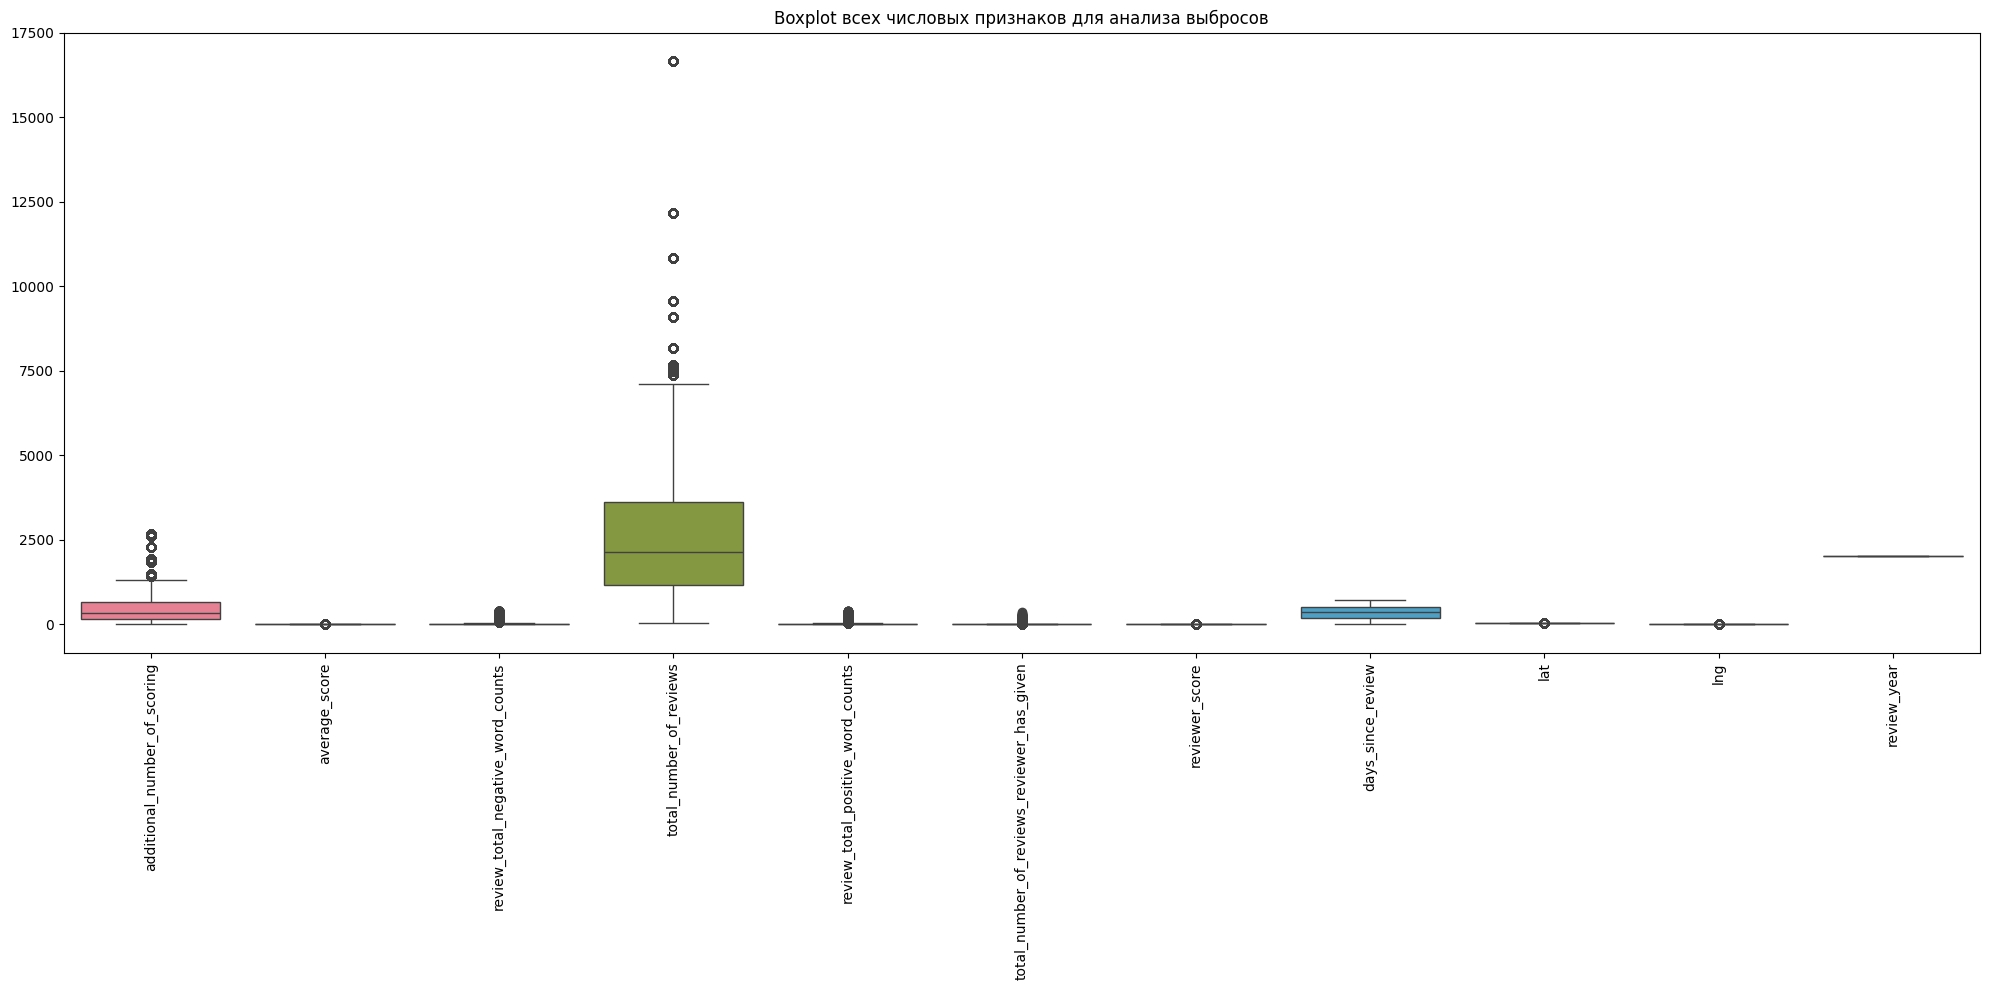

In [36]:
# визуализируем выбросы
plt.figure(figsize=(20, 10))
sns.boxplot(data=fill_data)

plt.xticks(rotation=90)
plt.title('Boxplot всех числовых признаков для анализа выбросов')
plt.tight_layout()
plt.show()

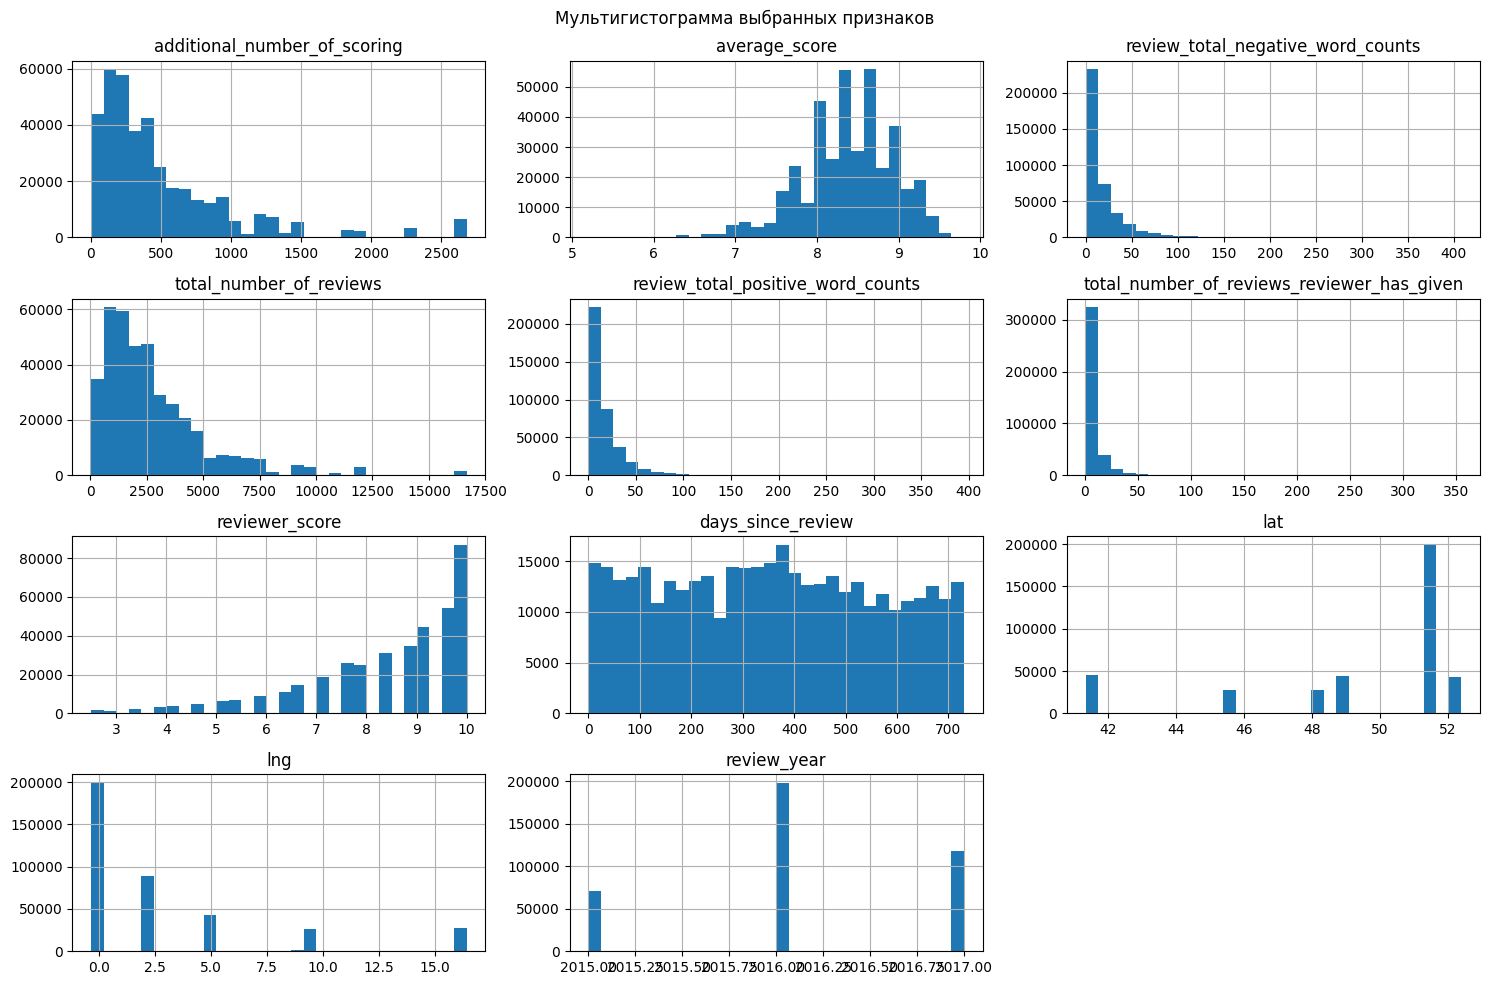

In [37]:
fill_data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Мультигистограмма выбранных признаков')
plt.tight_layout()
plt.show()

***Достаточно очевидно, что данные нуждаются в очистке***

In [38]:
# уберем выбросы во всех числовых значениях
df_cleaned = fill_data.copy()

for col in df_cleaned.select_dtypes(include=[np.number]).columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Заменяем выбросы на граничные значения
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

print("Выбросы заменены на граничные значения без потери записей!")
print(f"Размер датасета: {len(df_cleaned)} записей")

Выбросы заменены на граничные значения без потери записей!
Размер датасета: 386803 записей


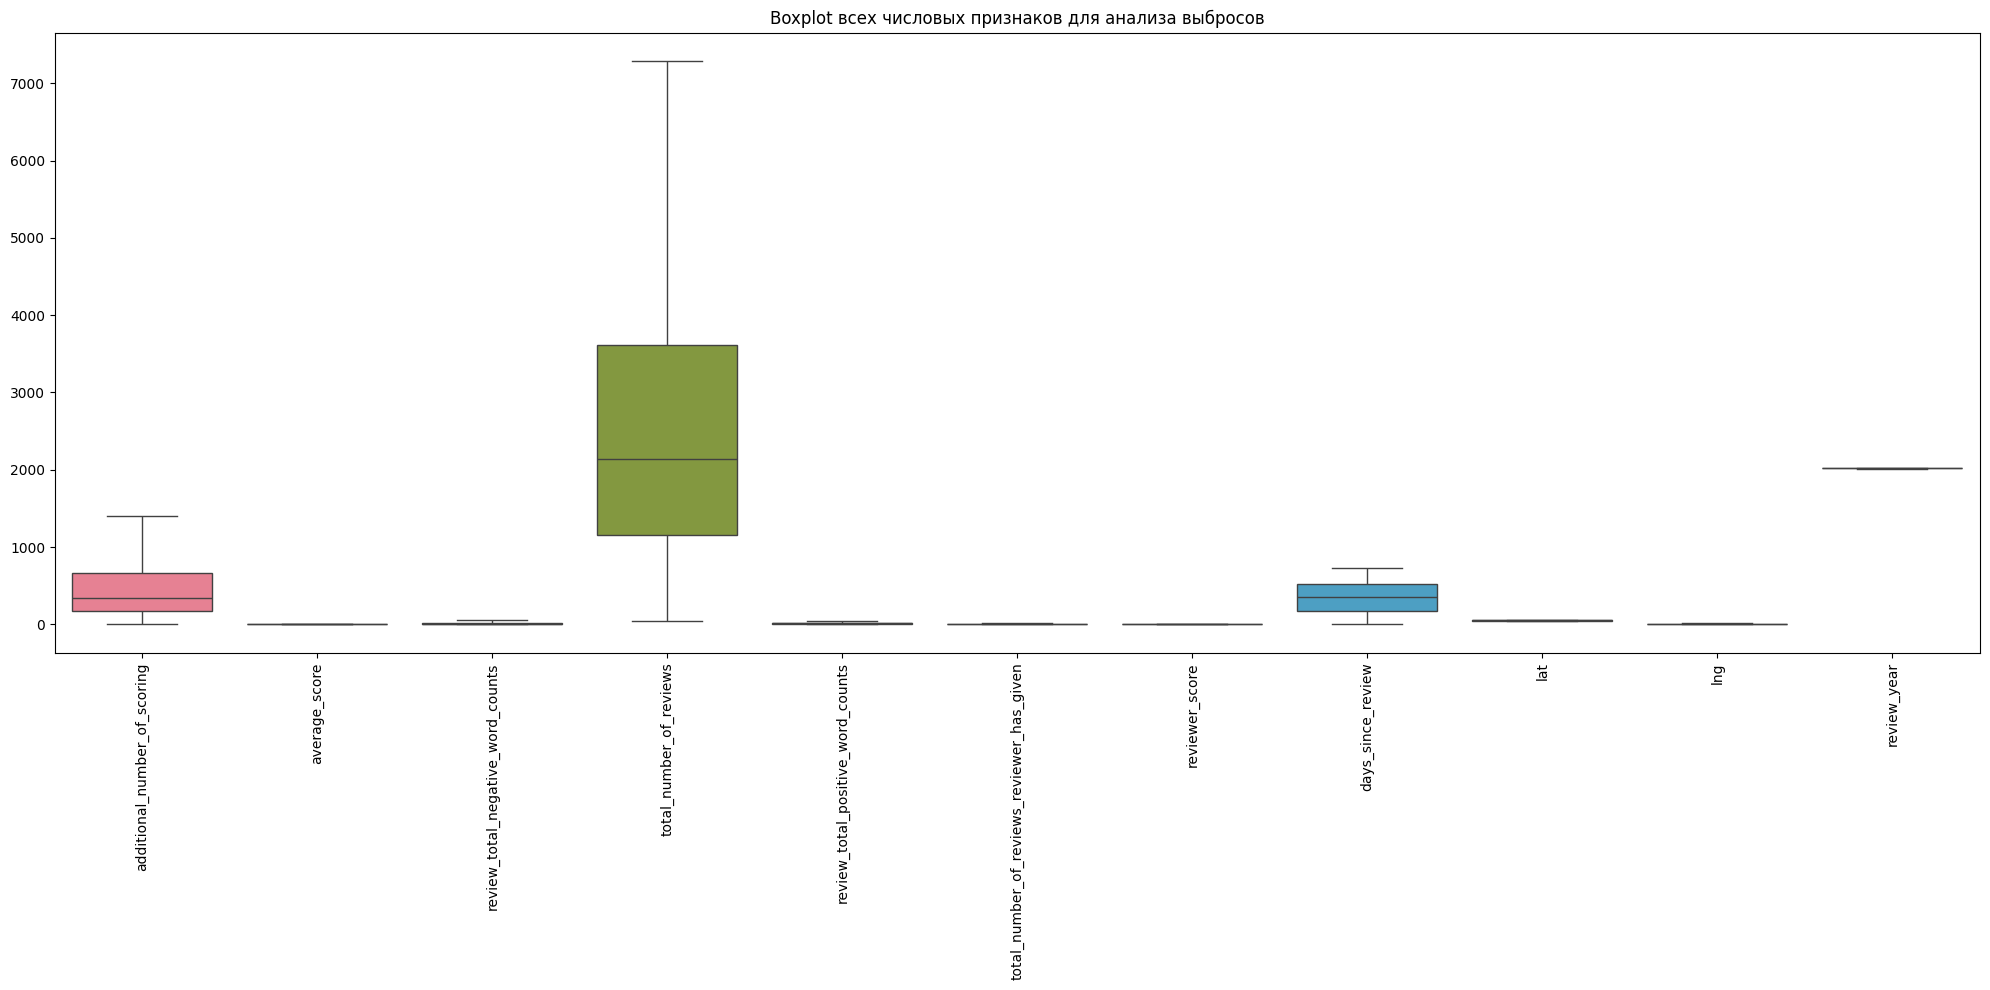

In [39]:
# быстрая проверка
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_cleaned)

plt.xticks(rotation=90)
plt.title('Boxplot всех числовых признаков для анализа выбросов')
plt.tight_layout()
plt.show()

***Избавившись от выбросов проведем корреляционный анализ признаков***

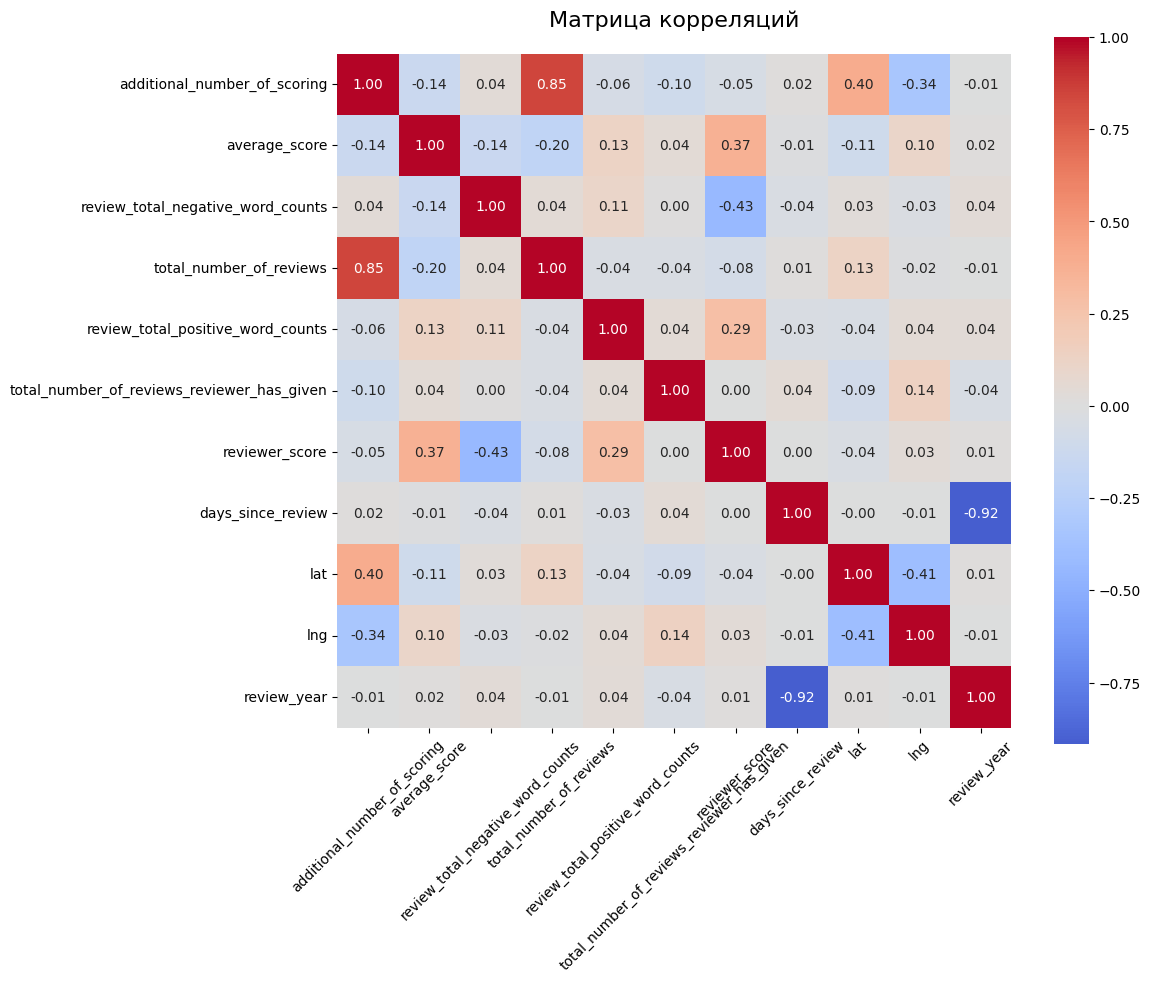

In [40]:
corr_matrix = df_cleaned.corr()

# Визуализируем heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,    
            fmt='.2f',     
            cmap='coolwarm', 
            center=0,      
            square=True)   

plt.title('Матрица корреляций', fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Достаточно сильными корреляциями обладают следующие пары признаков:**
- total_number_of_reviews & additional_number_of_scorring.
- additional_number_of_scorring & review_total_negative_word_counts.
- review_year & total_number_of_reviews_reviewer_has_given.
- days_since_review & review_year.

Рискнем оставить только их, а затем проведем дополнительную оценку значимости переменных.

In [ ]:
# напоминание
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 11 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  float64
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  float64
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  float64
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  float64
 6   reviewer_score                              386803 non-null  float64
 7   days_since_review                           386803 non-null  int64  
 8   lat                                         386803 non-null  float64
 9   lng                                         386803 non-null  float64
 

In [42]:
# удаляем, не трогая reviewer_score (так как от нее отталкивались с самого начала)
df_cleaned = df_cleaned.drop(['lat', 'lng'], axis=1)
df_cleaned.head()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,review_year
0,581.0,8.4,3.0,1994,4.0,7.0,10.0,531,2016
1,299.0,8.3,3.0,1361,2.0,14.0,6.3,203,2017
2,32.0,8.9,6.0,406,0.0,14.0,7.5,289,2016
3,34.0,7.5,0.0,607,11.0,8.0,10.0,681,2015
4,914.0,8.5,4.0,7291,20.0,10.0,9.6,516,2016


**У нас остались только числовые признаки, без категориальных (никак не подтянуть, чтобы, как я понимаю, ничего не испортить). Оценим значимость только числовых признаков.**

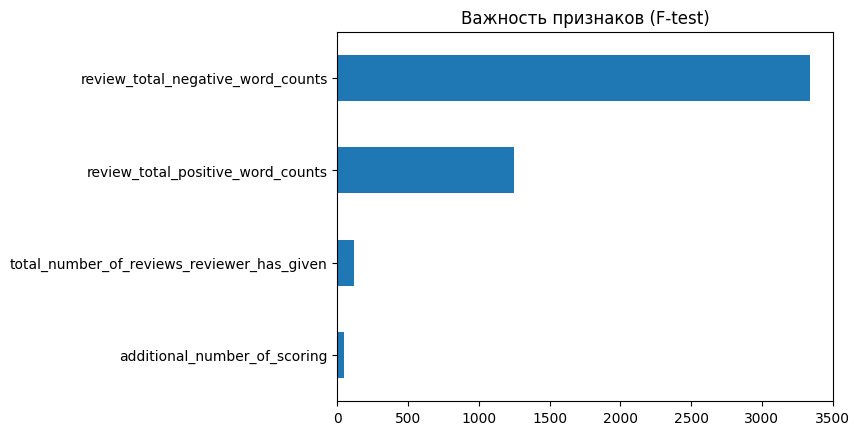

In [ ]:
num_cols = ['additional_number_of_scoring', 
            'review_total_negative_word_counts',
            'review_total_positive_word_counts',
            'total_number_of_reviews_reviewer_has_given']

# y - целевая переменная
y = df_cleaned['reviewer_score']

# X - все признаки кроме целевой
X = df_cleaned.drop('reviewer_score', axis=1)

# Применяем f_classif к выбранным числовым признакам
imp_num = pd.Series(f_classif(X[num_cols], y)[0], index=num_cols)

# Сортировка и визуализация
imp_num.sort_values(inplace=True)
imp_num.plot(kind='barh', title='Важность признаков (F-test)')
plt.show()

**Можно было бы удалить additional_number_of_scoring, но, вероятно, просто оценка (без отзыва) поможет нам лучше предсказать рейтинг отеля.**

>**Проводим финальное обучение модели**

In [50]:
# Определение признаков и целевой переменной
X = df_cleaned.drop('reviewer_score', axis=1)
y = df_cleaned['reviewer_score']
# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Создание и обучение модели
regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train)
# Предсказание и оценка
y_pred = regr.predict(X_test)

In [51]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12737993568551095


>**Показатель МАРЕ улучшился. После проведенных манипуляций с данными мы добились значение 0.12 (12%). Это означает, что модель ошибается в среднем на 12% от истинного значения.**